In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv(r"/kaggle/input/wine-dataset-for-clustering/wine-clustering.csv")
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


# Data understanding and EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [5]:
df.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic_Acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Ash_Alcanity,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total_Phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid_Phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
Color_Intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


In [7]:
[i for i in df.columns if df[i].dtypes != 'int64']

['Alcohol',
 'Malic_Acid',
 'Ash',
 'Ash_Alcanity',
 'Total_Phenols',
 'Flavanoids',
 'Nonflavanoid_Phenols',
 'Proanthocyanins',
 'Color_Intensity',
 'Hue',
 'OD280']

In [8]:
continous = [i for i in df.columns if df[i].dtypes != 'int64']

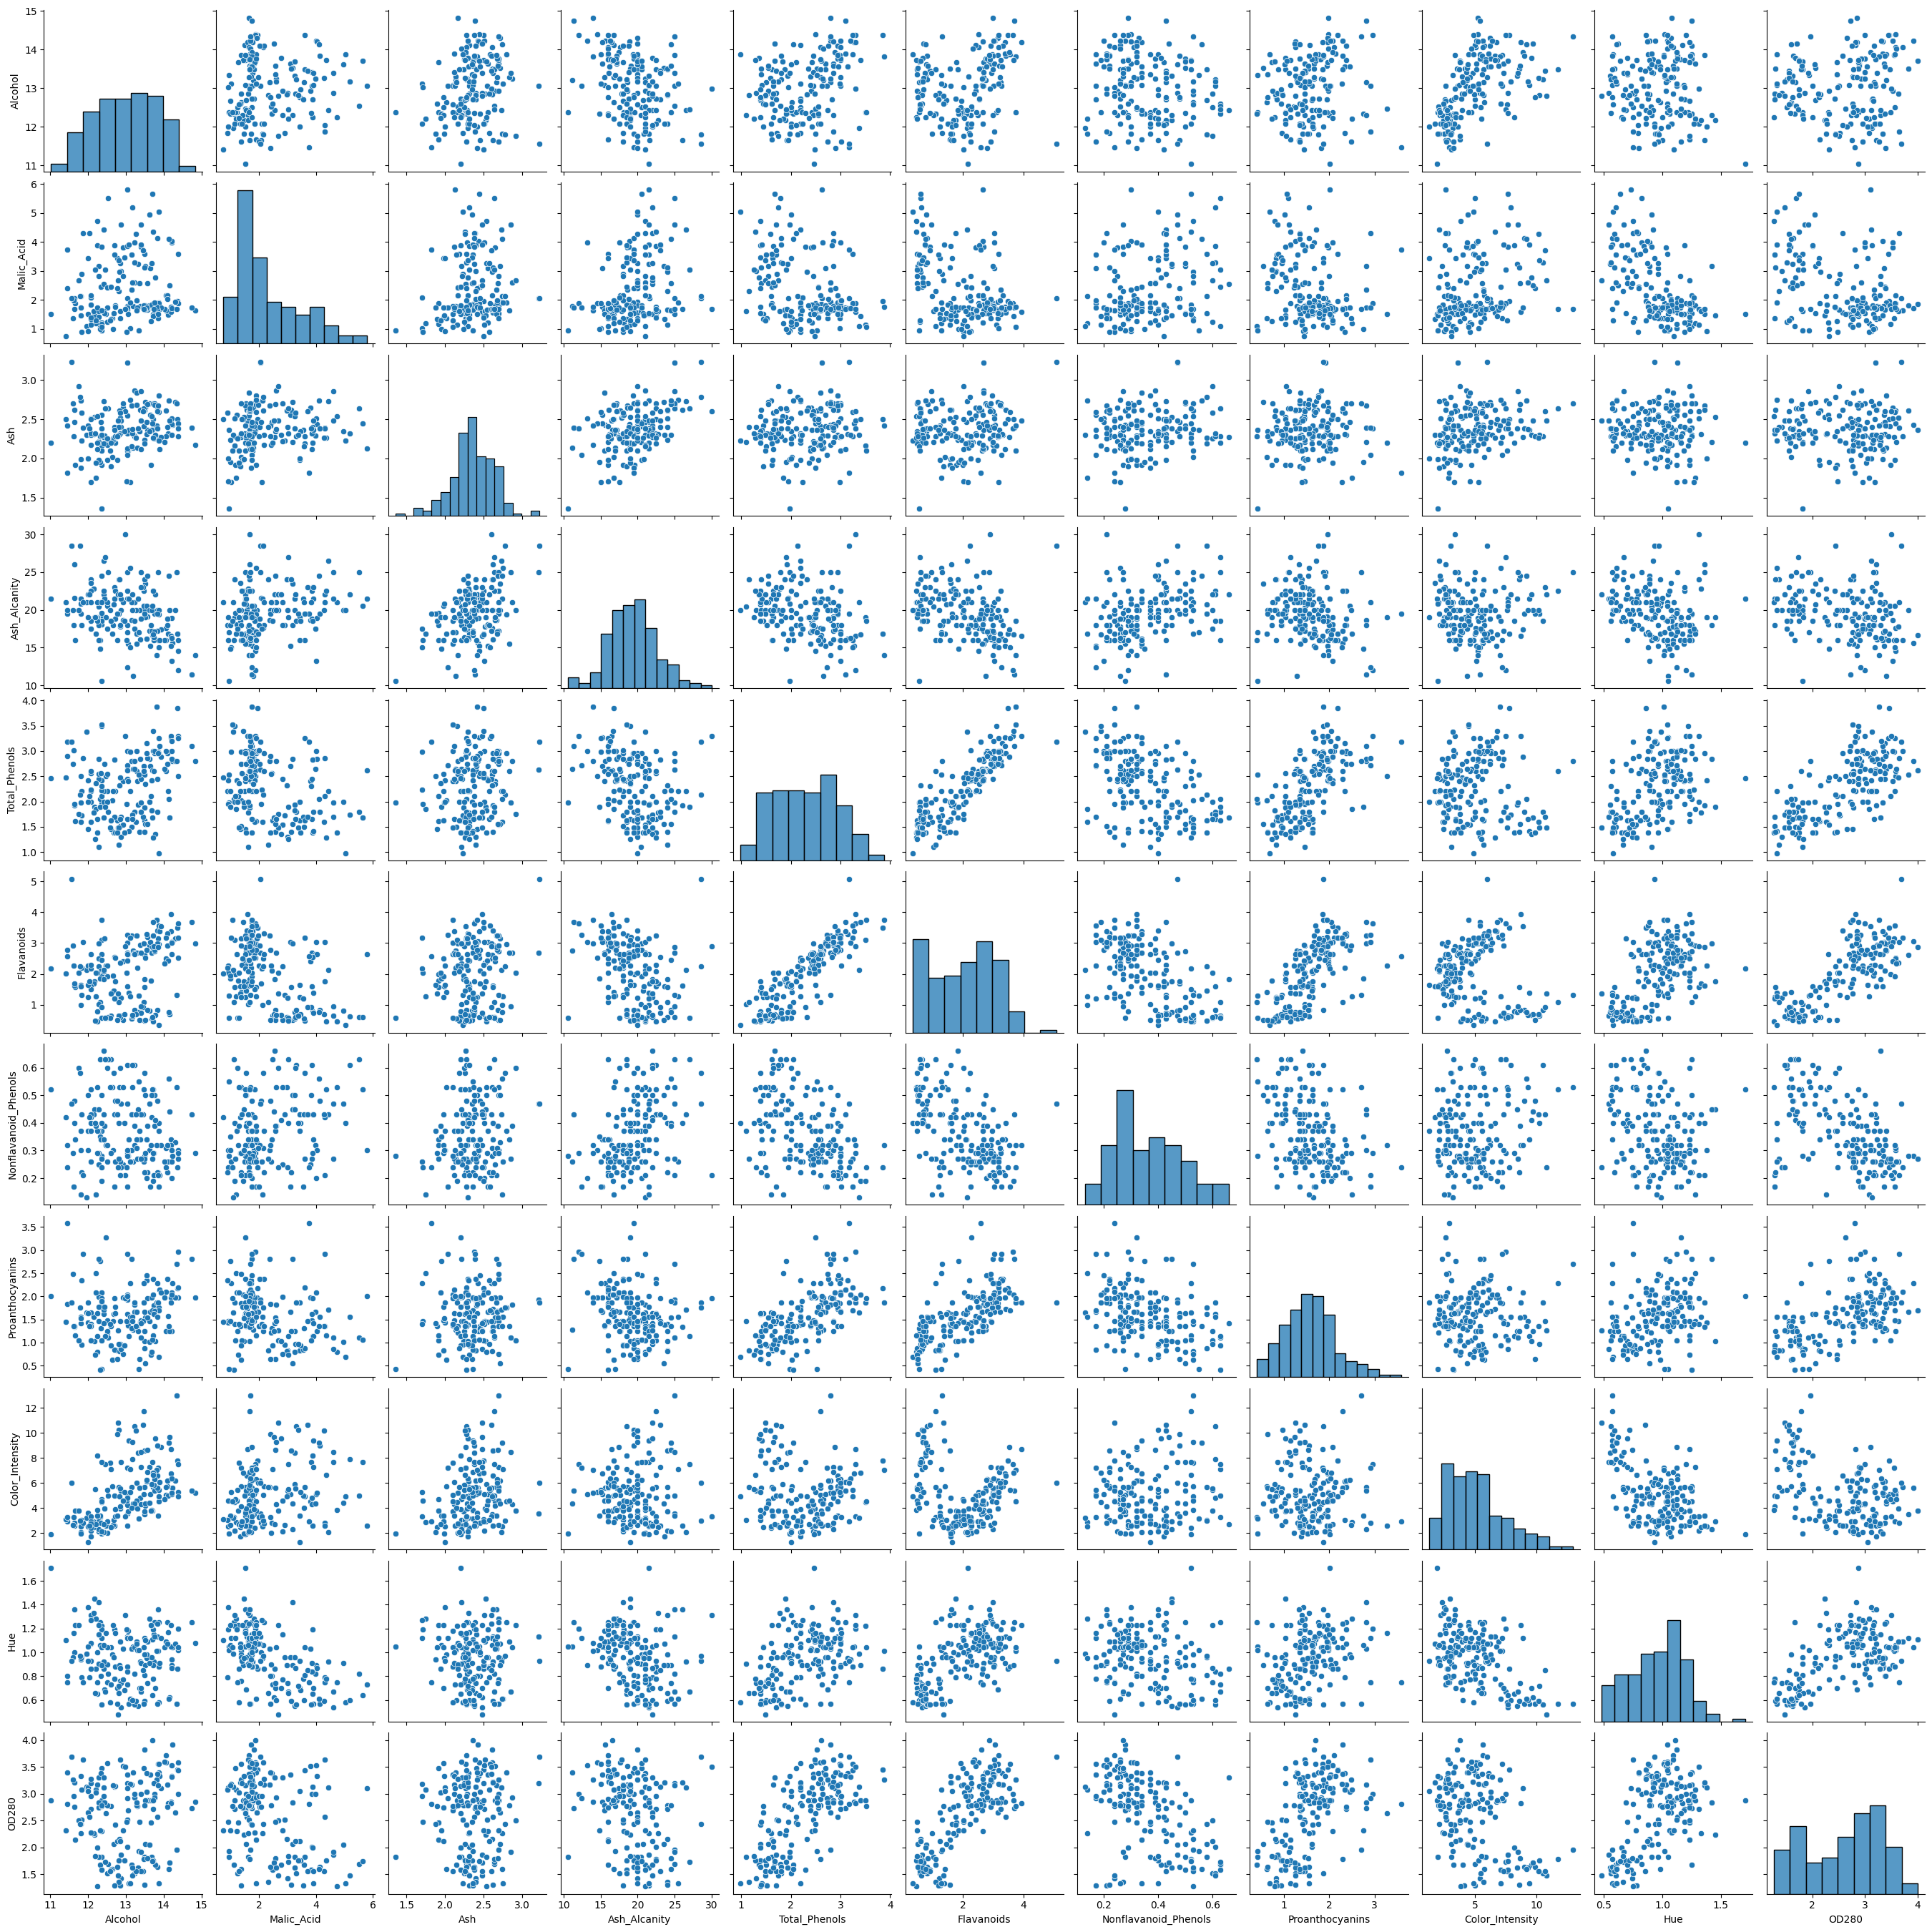

In [9]:
sns.pairplot(vars = continous,data = df)

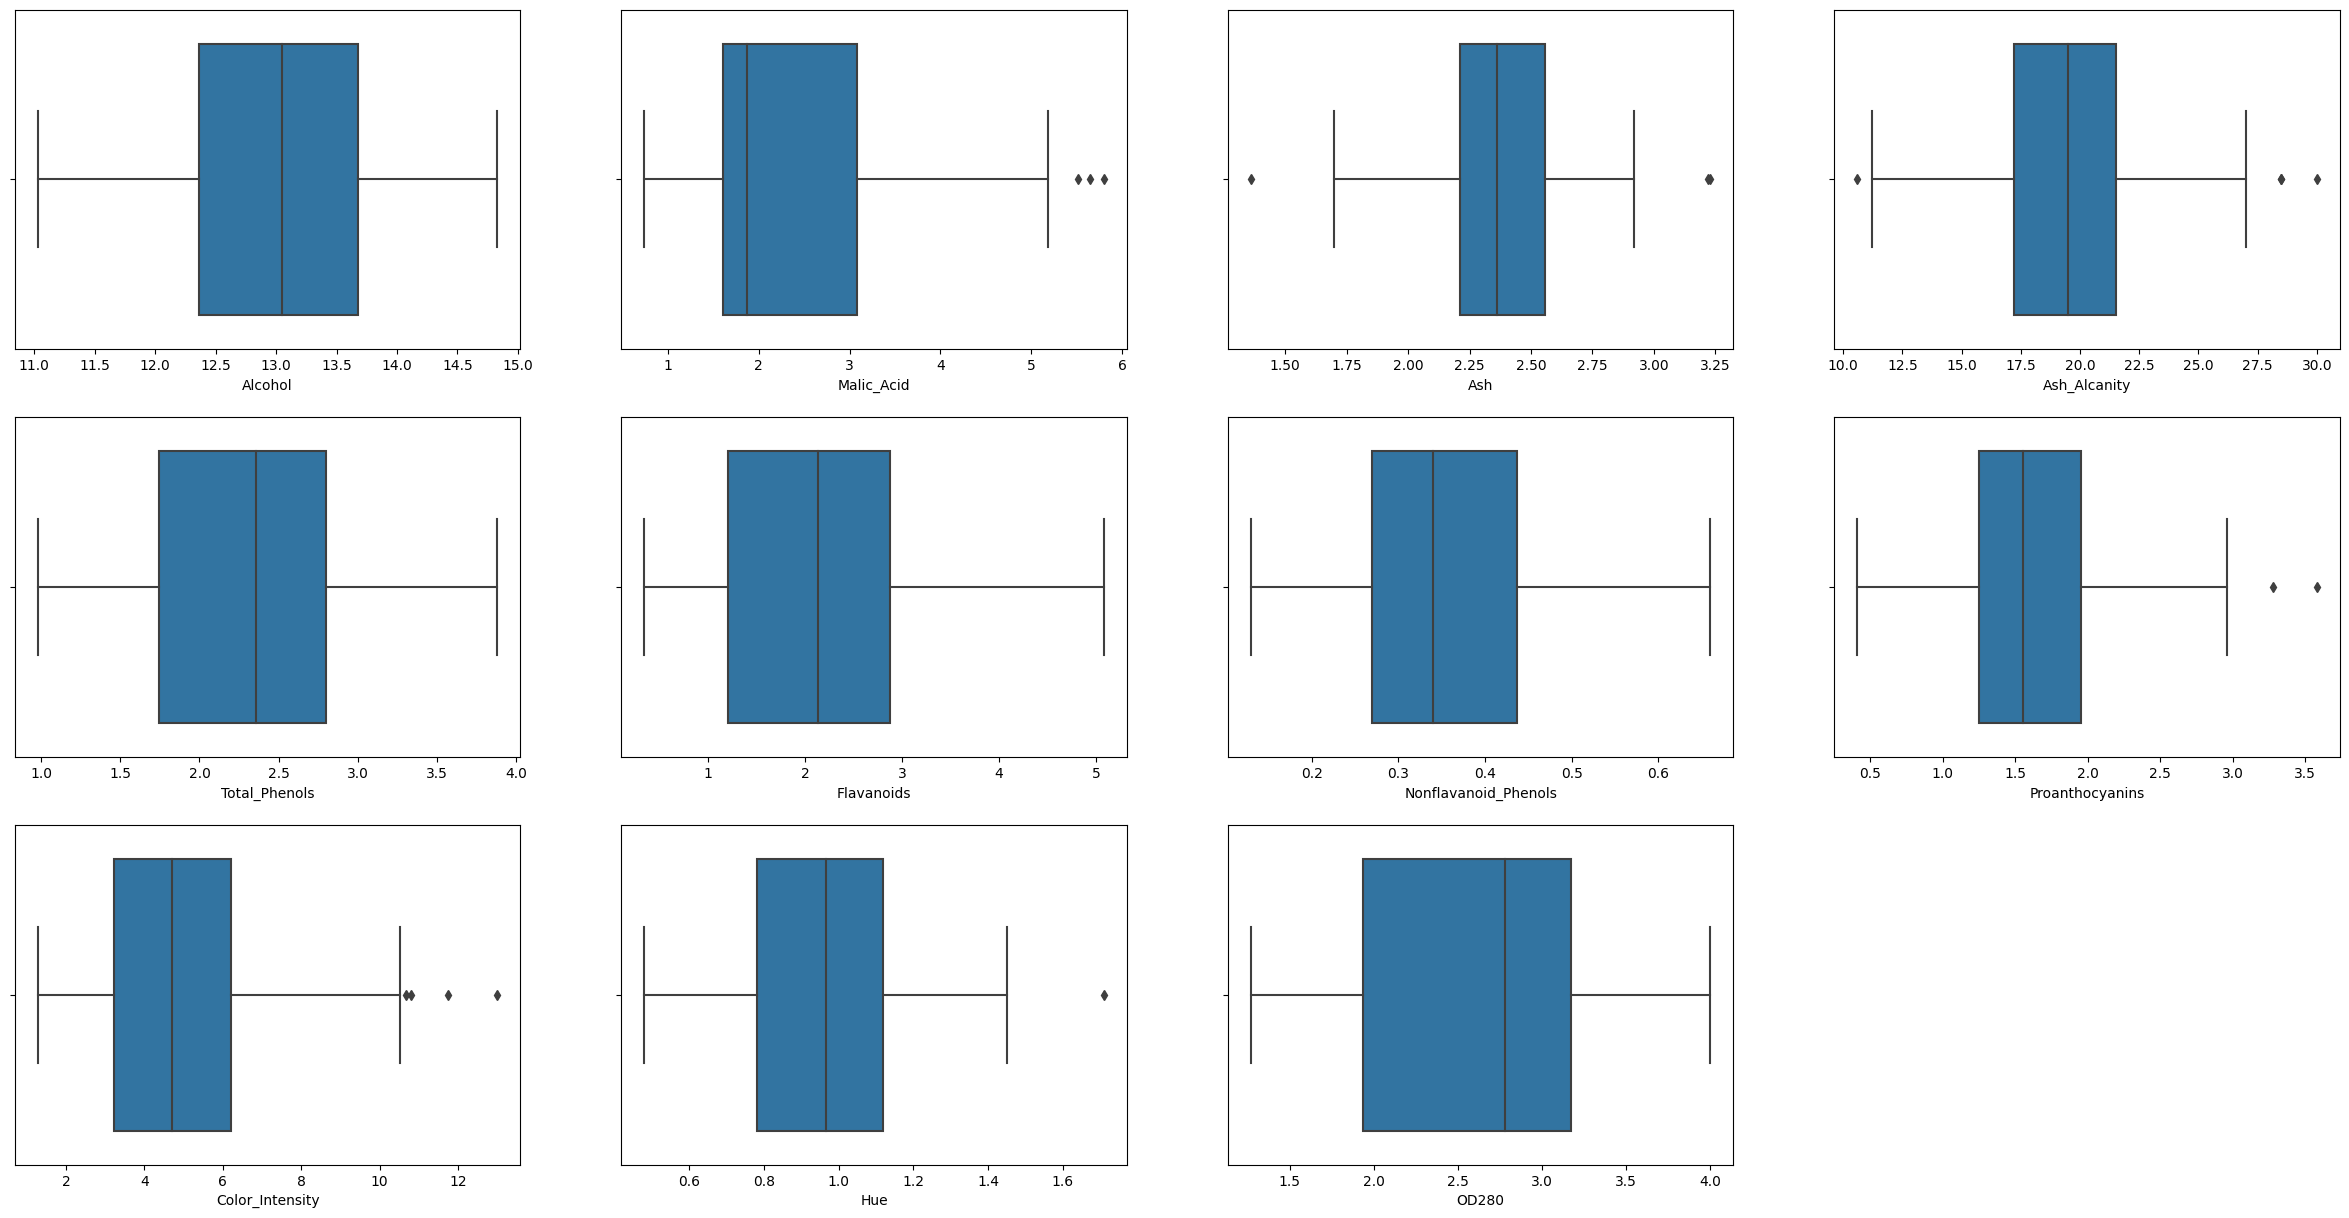

In [10]:
plt.figure(figsize = (30,15))
m = 1
for i in continous:
    plt.subplot(3,4,m)
    sns.boxplot(x = df[i])
    m += 1

<Axes: >

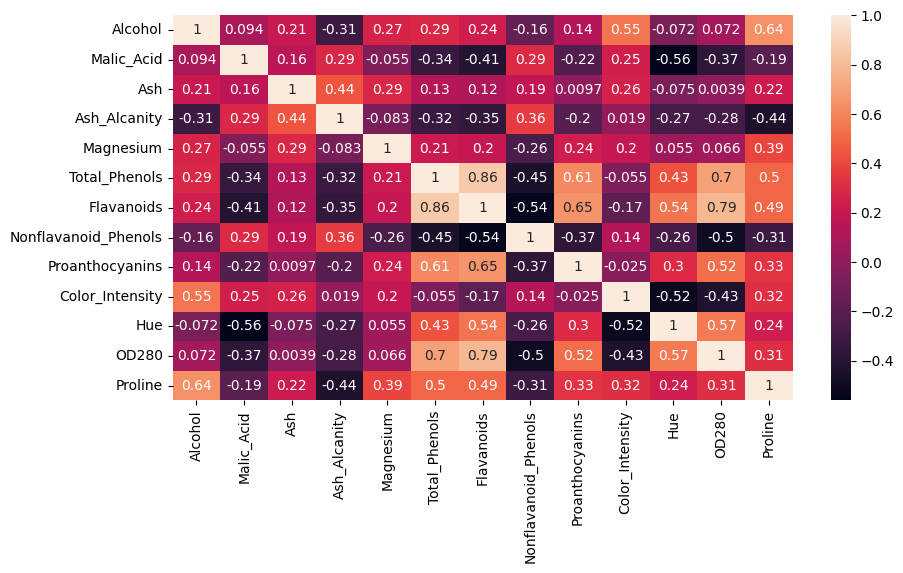

In [11]:
plt.figure(figsize = (10,5))
sns.heatmap(df.corr(),annot = True)

In [12]:
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [13]:
df.duplicated().sum()

0

In [14]:
df.skew()

Alcohol                -0.051482
Malic_Acid              1.039651
Ash                    -0.176699
Ash_Alcanity            0.213047
Magnesium               1.098191
Total_Phenols           0.086639
Flavanoids              0.025344
Nonflavanoid_Phenols    0.450151
Proanthocyanins         0.517137
Color_Intensity         0.868585
Hue                     0.021091
OD280                  -0.307285
Proline                 0.767822
dtype: float64

# Data preprocessing 

- no duplicates
- no null values

In [15]:
outliers_index = []
for i in continous:
        Q1 = df[i].quantile(0.25)
        Q3 = df[i].quantile(0.75)
        IQR = Q3 - Q1
        ll = Q1 -1.5*IQR
        ul = Q3+1.5*IQR
        if len(df[(df[i] < ll) | (df[i] > ul)]) > 0:
             outliers_index.append(df[(df[i] < ll) | (df[i] > ul)].index.to_list())
print(*outliers_index)

[123, 137, 173] [25, 59, 121] [59, 73, 121, 127] [95, 110] [151, 158, 159, 166] [115]


In [16]:
df = df.drop([123, 137, 173,25, 59, 121,59, 73, 121, 127,95, 110,151, 158, 159,115],axis = 0)

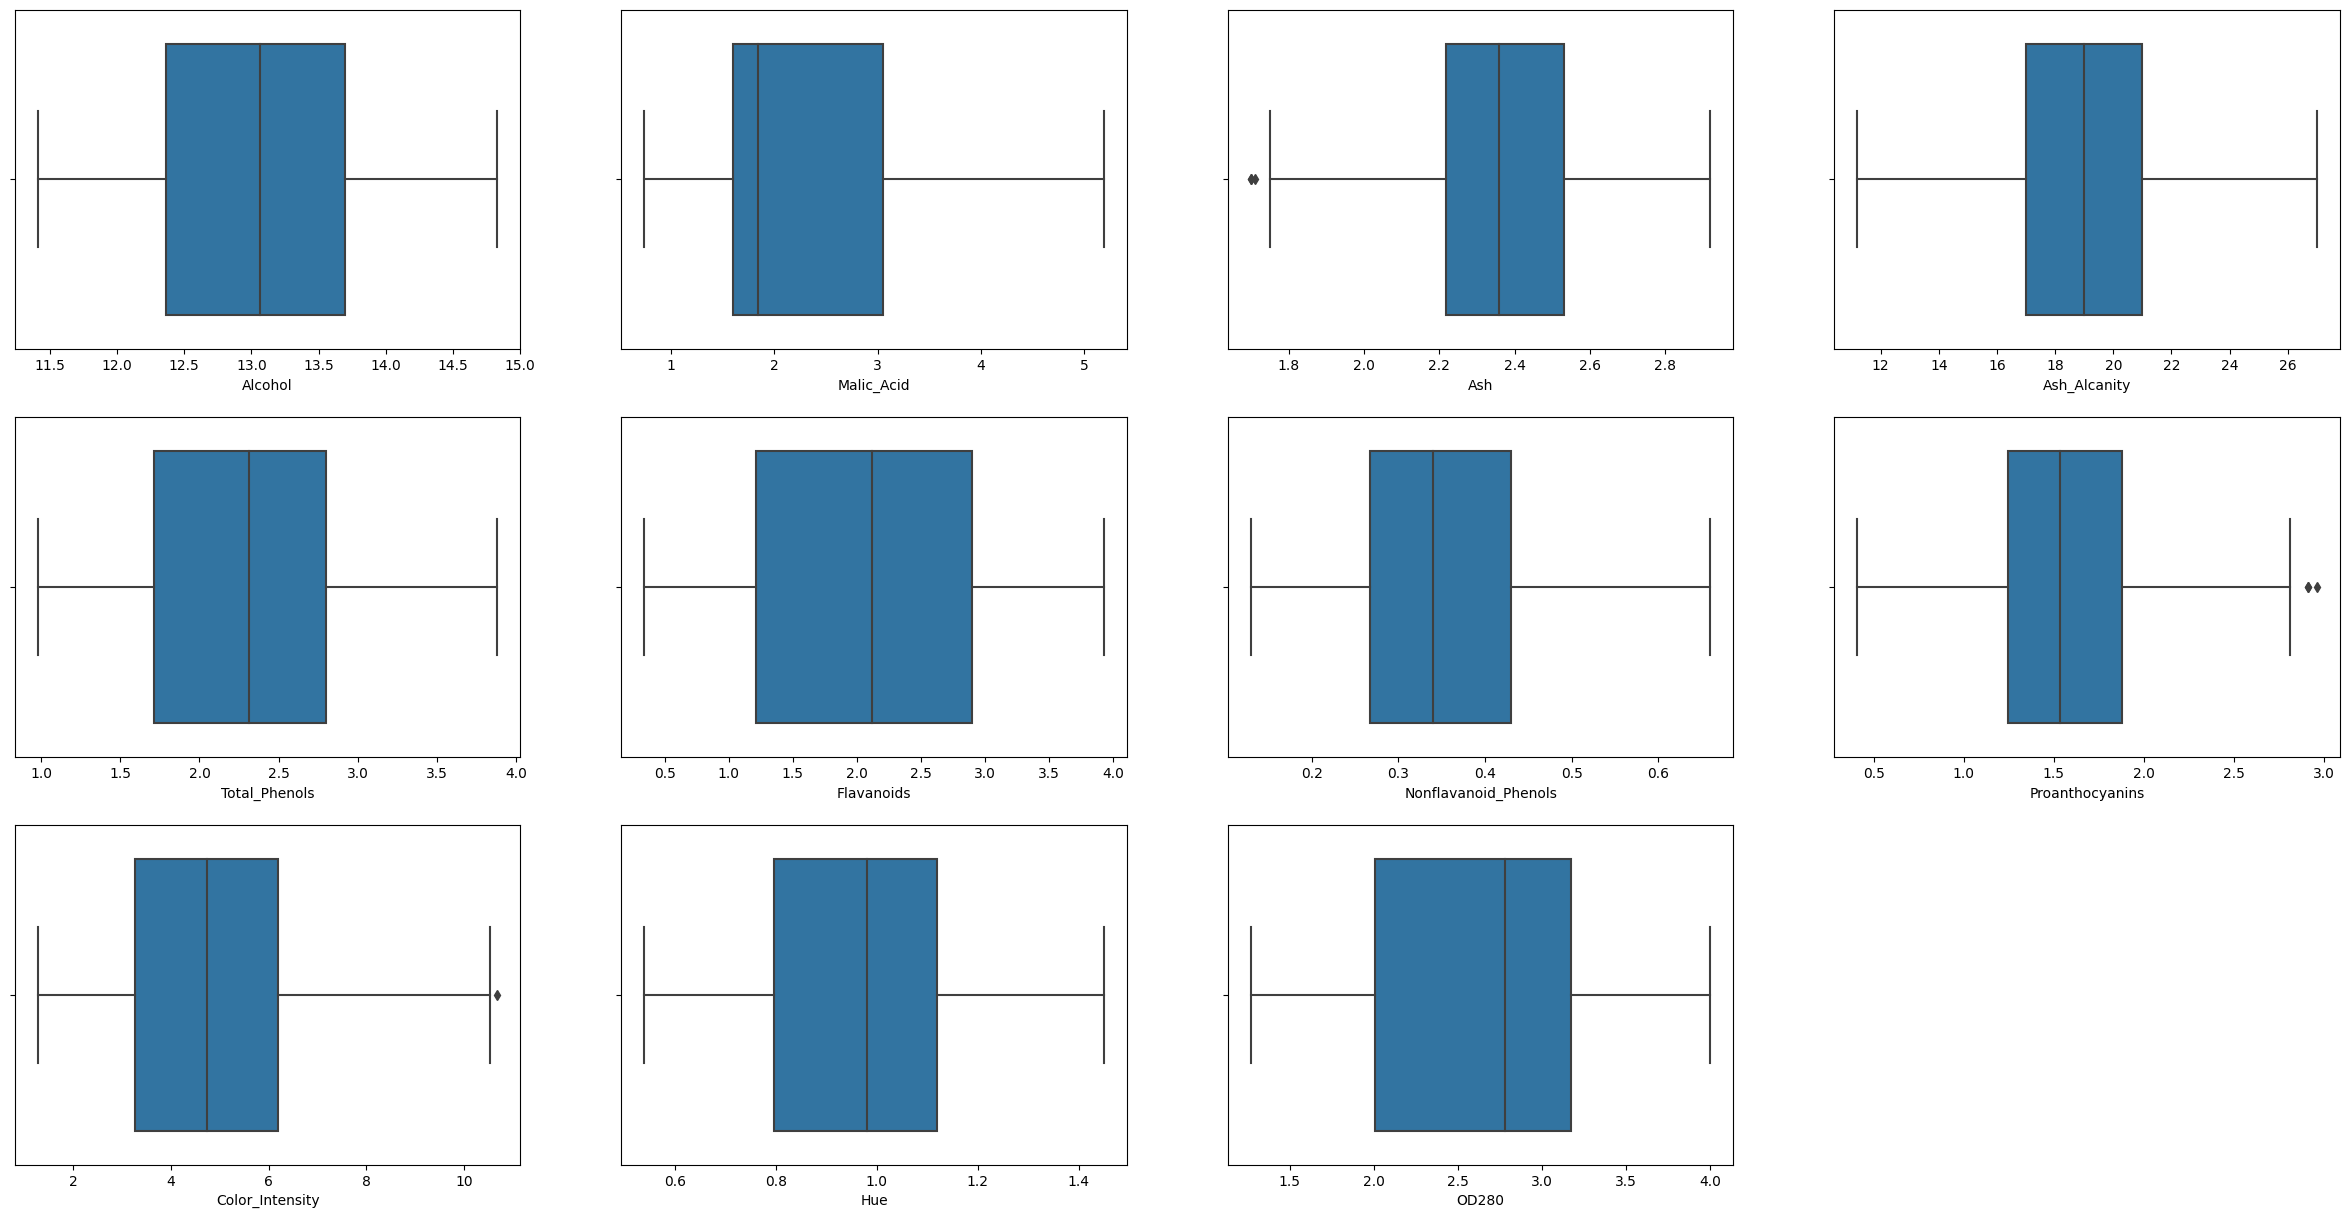

In [17]:
plt.figure(figsize = (30,15))
m = 1
for i in continous:
    plt.subplot(3,4,m)
    sns.boxplot(x = df[i])
    m += 1

In [18]:
discrete_count = [i for i in df.columns if df[i].dtypes == 'int64']

In [19]:
discrete_count

['Magnesium', 'Proline']

In [20]:
outliers_index = []
for i in discrete_count:
        Q1 = df[i].quantile(0.25)
        Q3 = df[i].quantile(0.75)
        IQR = Q3 - Q1
        ll = Q1 -1.5*IQR
        ul = Q3+1.5*IQR
        if len(df[(df[i] < ll) | (df[i] > ul)]) > 0:
             outliers_index.append(df[(df[i] < ll) | (df[i] > ul)].index.to_list())
print(*outliers_index)

[69, 78]


In [21]:
df = df.drop([69,78],axis = 0)

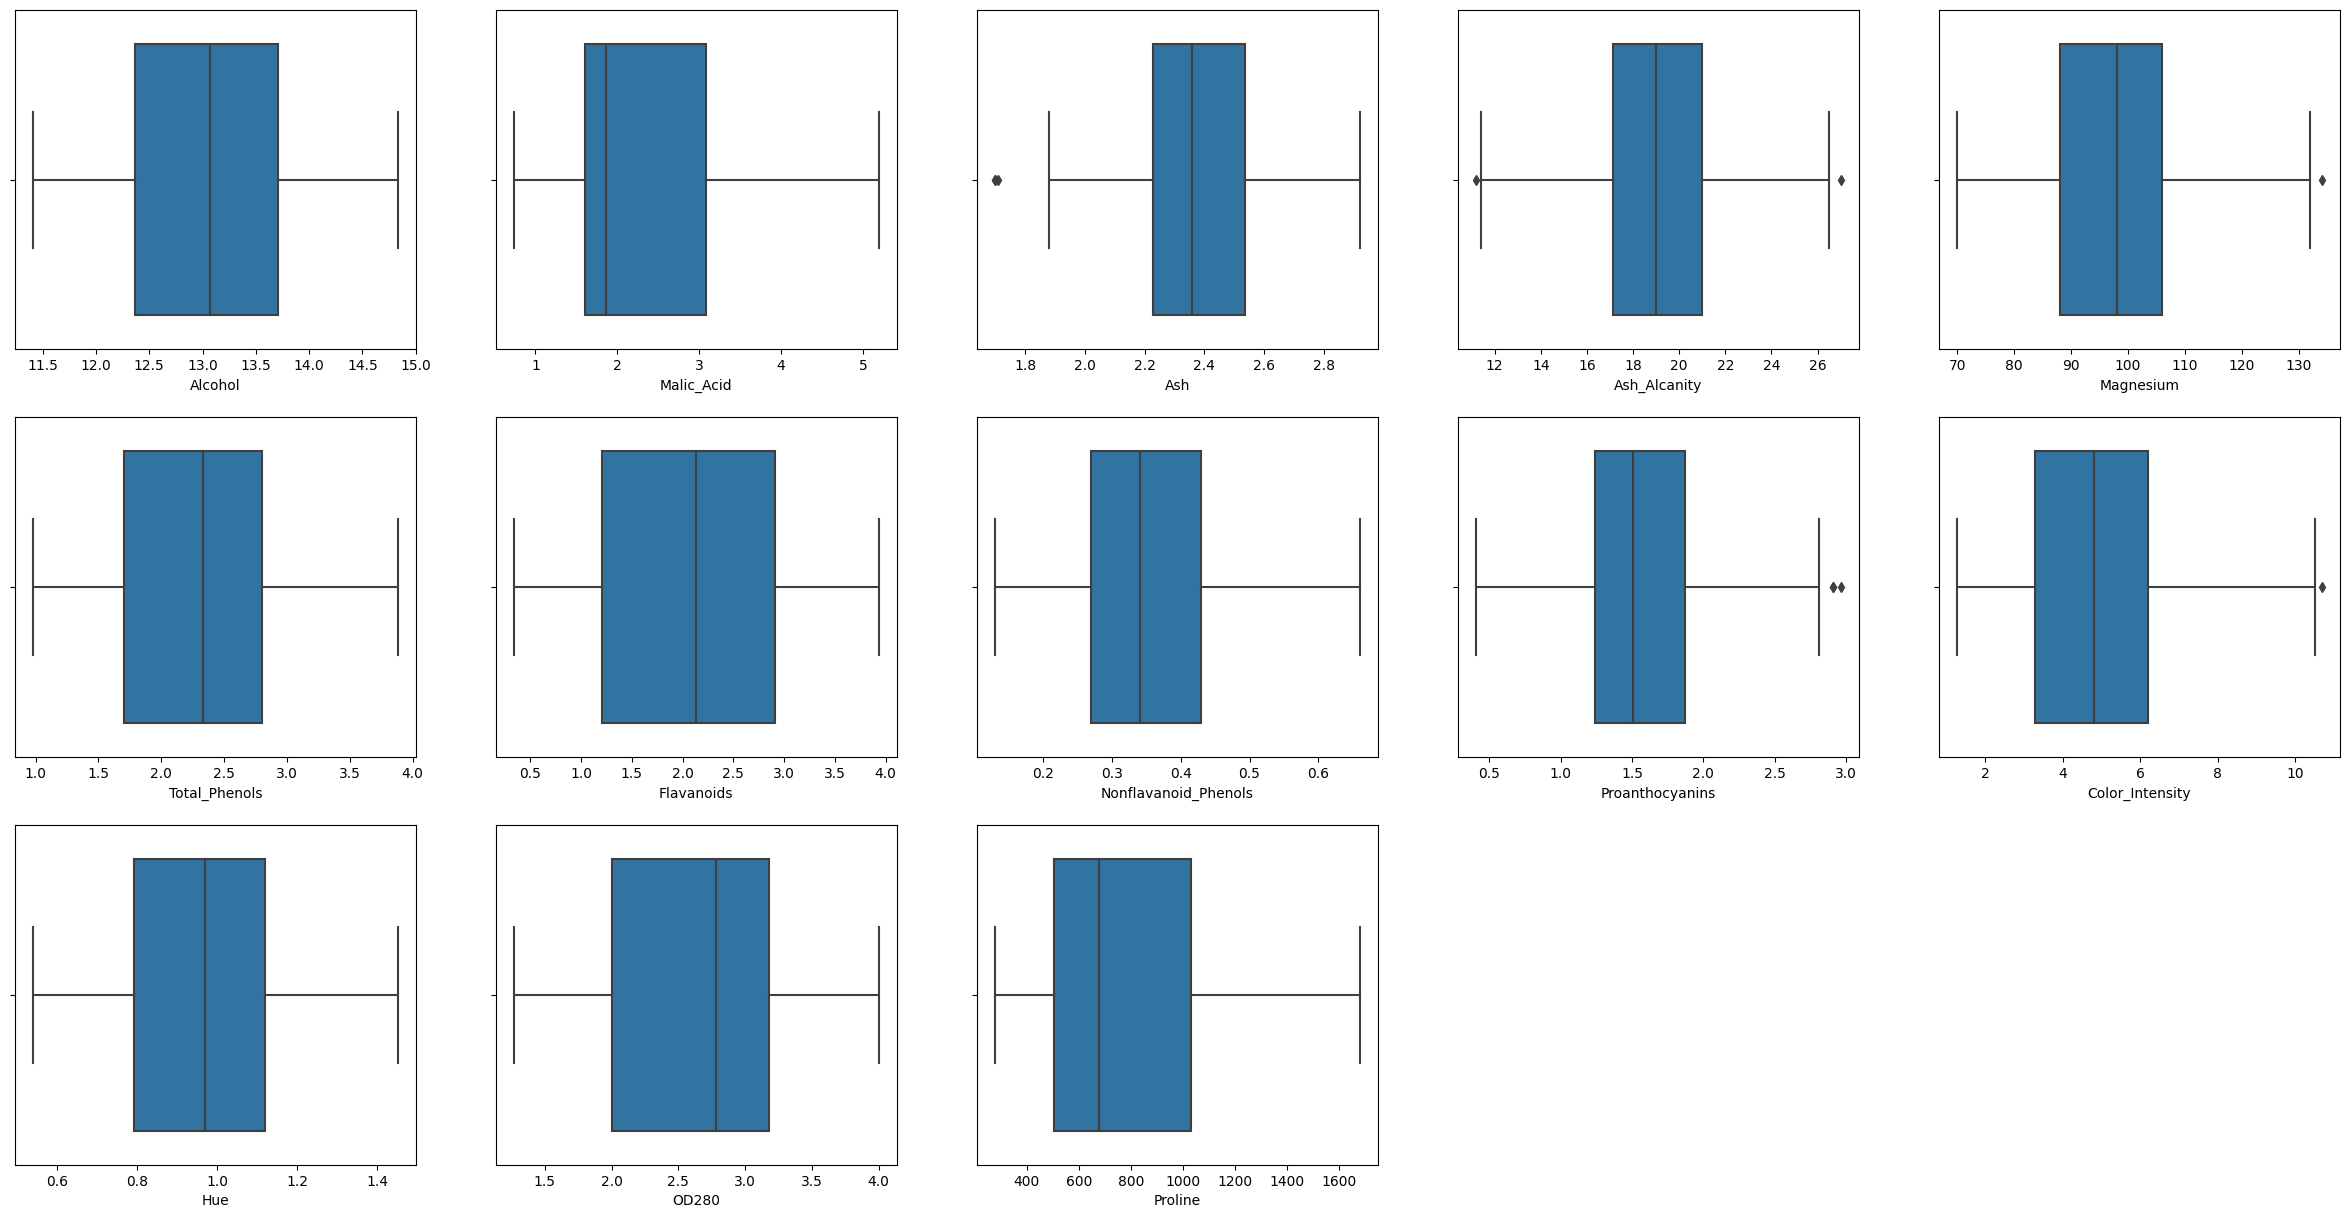

In [22]:
plt.figure(figsize = (30,15))
m = 1
for i in df.columns:
    plt.subplot(3,5,m)
    sns.boxplot(x = df[i])
    m += 1

# Data wrangling
- no encoding : all the values are numerical


# Normality

In [23]:
df.skew()

Alcohol                -0.040657
Malic_Acid              0.871948
Ash                    -0.226848
Ash_Alcanity            0.021026
Magnesium               0.482769
Total_Phenols           0.094158
Flavanoids             -0.118522
Nonflavanoid_Phenols    0.508741
Proanthocyanins         0.333681
Color_Intensity         0.650546
Hue                    -0.132441
OD280                  -0.347129
Proline                 0.703333
dtype: float64

# Scaling

In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df = pd.DataFrame(sc.fit_transform(df),columns = df.columns)

# X = df

In [25]:
X = df

## Hypertuning

In [26]:
wcss = []
for i in range(1,9):
    from sklearn.cluster import KMeans
    kmeans = KMeans(n_clusters = i,init = "k-means++",random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
print(wcss)

[2106.0, 1458.9885166829583, 1084.516528192465, 1000.5557561468711, 939.6784016139453, 894.7035228818387, 855.1635206745503, 802.9695339227393]


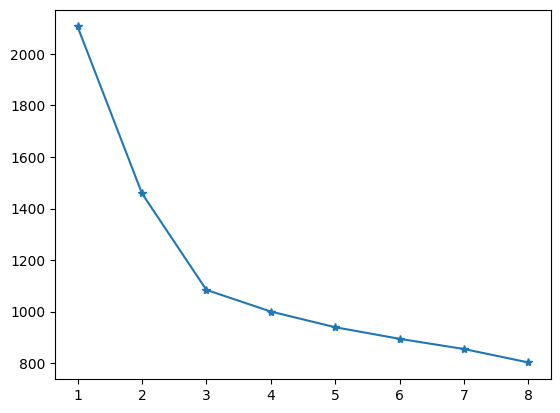

In [27]:
plt.plot(range(1,9),wcss,marker = '*')
plt.xticks(range(1,9))
plt.show()

- **Observation**
- from the point 3 : it started flattening so n_clusters = 3

# Modelling

In [28]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3,init = "k-means++")
X['category'] = kmeans.fit_predict(X)

In [29]:
X.sample(5)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,category
2,0.147563,0.042548,1.269603,-0.217754,0.193786,0.814523,1.223342,-0.483388,2.415521,0.293350,0.330007,0.771935,1.324273,0
98,-0.671541,-0.558900,-1.600290,0.413363,-1.104130,-0.137631,-0.118813,-0.318353,-0.129209,-0.980741,0.376118,1.335620,-0.269388,1
136,0.349189,0.882666,0.063416,0.745530,-0.536292,-0.566101,-1.298283,0.754370,-0.569275,1.567440,-1.883324,-1.412343,-0.337732,2
149,0.928863,0.424420,-0.269325,0.911613,-0.698531,-1.486517,-1.379625,0.424301,-0.990208,2.106836,-1.191658,-1.327791,-0.446461,2
121,-0.293493,-0.005186,0.146601,1.575946,-0.049573,-1.803902,-0.962744,-0.730939,-1.372874,0.302650,-1.376102,-1.778739,-0.617322,2


<Axes: xlabel='Alcohol', ylabel='Malic_Acid'>

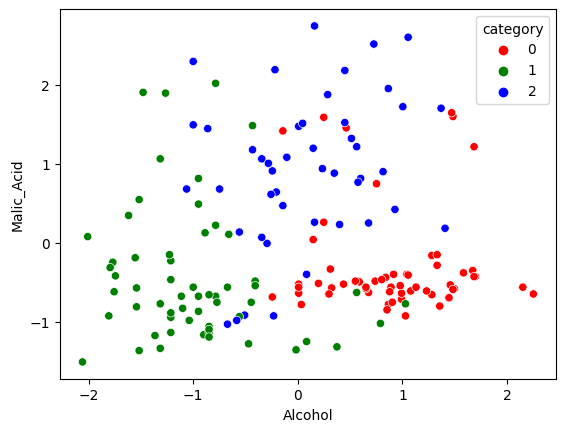

In [30]:
sns.scatterplot(x = 'Alcohol',y = 'Malic_Acid',hue = 'category',data = df,palette=['red','green','blue'])

In [31]:
X.columns.to_list()

['Alcohol',
 'Malic_Acid',
 'Ash',
 'Ash_Alcanity',
 'Magnesium',
 'Total_Phenols',
 'Flavanoids',
 'Nonflavanoid_Phenols',
 'Proanthocyanins',
 'Color_Intensity',
 'Hue',
 'OD280',
 'Proline',
 'category']

In [32]:
for  i in X.columns:
    print('X'+'.'+i)

X.Alcohol
X.Malic_Acid
X.Ash
X.Ash_Alcanity
X.Magnesium
X.Total_Phenols
X.Flavanoids
X.Nonflavanoid_Phenols
X.Proanthocyanins
X.Color_Intensity
X.Hue
X.OD280
X.Proline
X.category


In [33]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Assuming you have a DataFrame 'df' containing the relevant columns
# Replace this DataFrame creation with your actual data

# Generate some example data (replace this with your actual data)
data = {
    'Alcohol': X.Alcohol,
    'Malic_Acid': X.Malic_Acid,
    'Ash': X.Ash,
    'Ash_Alcanity': X.Ash_Alcanity,
    'Magnesium': X.Magnesium,
    'Total_Phenols': X.Total_Phenols,
    'Flavanoids': X.Flavanoids,
    'Nonflavanoid_Phenols': X.Nonflavanoid_Phenols,
    'Proanthocyanin': X.Proanthocyanins,
    'Color_Intensity': X.Color_Intensity,
    'Hue': X.Hue,
    'OD280': X.OD280,
    'Proline': X.Proline,
    'category': X.category,
}
df = pd.DataFrame(data)

# Create traces for each category
traces = []
for category, color in zip(df['category'].unique(), ['red', 'green', 'blue']):
    subset = df[df['category'] == category]
    trace = go.Scatter3d(
        x=subset['Alcohol'],
        y=subset['Malic_Acid'],
        z=subset['Ash'],  
        mode='markers',
        marker=dict(
            color=color,
            size=5,
            opacity=0.8
        ),
        name=str(category)  # Convert category to string
    )
    traces.append(trace)

# Create subplots
fig = make_subplots(rows=1, cols=1, specs=[[{'type': 'scene'}]])

# Add traces to the subplot
for trace in traces:
    fig.add_trace(trace, row=1, col=1)

# Update layout
fig.update_layout(
    scene=dict(
        xaxis=dict(title='Alcohol'),
        yaxis=dict(title='Malic Acid'),
        zaxis=dict(title='Ash')
    ),
    title='Clusters in 3D'
)

# Show plot
fig.show()
